<a href="https://colab.research.google.com/github/Merrill921/Machine_Learning/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import sqlite3

import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import string
from pandas import DataFrame
nltk.download('stopwords')

# Установка соединения с базой данных SQLite и создание курсора
connection = sqlite3.connect('articles.db')
cursor = connection.cursor()

# Выполнение запроса для извлечения заголовков и текстов статей
cursor.execute("SELECT title, body FROM articles LIMIT 100")
data = cursor.fetchall()

# Разделение результатов запроса на отдельные списки заголовков и текстов
titles, contents = zip(*data)

# Закрытие соединения с базой данных
connection.close()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import sqlite3
!pip install natasha nltk matplotlib seaborn setuptools
from natasha import (
    Segmenter,
    MorphVocab,
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    NamesExtractor,
    Doc
)

# Установка соединения с базой данных SQLite и создание курсора
connection = sqlite3.connect('articles.db')
cursor = connection.cursor()

# Выполнение запроса для извлечения заголовков и текстов статей
cursor.execute("""SELECT title, body FROM articles LIMIT 100""")
data = cursor.fetchall()

# Разделение результатов запроса на отдельные списки заголовков и текстов
titles, contents = zip(*data)

# Закрытие соединения с базой данных
connection.close()

# Создание словаря из заголовков и текстов статей
data_dict = dict(zip(titles, contents))

# Инициализация компонентов Natasha
segmenter = Segmenter()
morph_vocab = MorphVocab()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

# Пример обработки текстов с помощью Natasha
for title, text in data_dict.items():
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.parse_syntax(syntax_parser)
    doc.tag_ner(ner_tagger)

    # Извлечение именованных сущностей
    for span in doc.spans:
        span.normalize(morph_vocab)

    # Здесь можно добавлять код для работы с результатами обработки
    print(f"Title: {title}")
    print(f"Entities: {doc.spans}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=25da867a3fc9c4b5d1f63d785176a1685b9fd853469c5779b46ea44f4a787509
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=bd8e6177652efd161989d06d96de01b2dce968103711f9b79c6682c10bf13b60
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built docopt intervaltree
Title: Раскрыта причина о

In [37]:
from ipymarkup import show_dep_ascii_markup as show_markup
articles = list(data)
articleForSyntax = articles[0]

doc = Doc(str(articleForSyntax))
doc.segment(segmenter)
doc.parse_syntax(syntax_parser)
doc.tag_morph(morph_tagger)

for sentence in doc.sents: # получаем предложения
  sentence.syntax.print()

┌──────────────────► (                   punct
│     ┌────────────► '                   punct
│     │ ┌──────────► Раскрыта            parataxis
│     │ │ ┌►┌───┌─── причина             appos
│     │ │ │ │   │ ┌► опасного            amod
│     │ │ │ │ ┌─└►└─ рака                nmod
│     │ │ │ │ │   ┌► у                   case
│     │ │ │ │ └──►└─ детей               nmod
│     │ │ │ └──────► '                   punct
│     │ │ │     ┌──► ,                   punct
│     │ │ │     │ ┌► '                   punct
│ ┌──►│ │ │     └─└─ Фото                appos
│ │   │ │ │       ┌► :                   punct
│ │ ┌►│ │ └─┌─┌─┌─└─ Marjorie            parataxis
│ │ │ │ │ │ │ │ └──► Bertrand            flat:foreign
│ │ │ │ │ │ │ │   ┌► /                   punct
│ │ │ │ │ │ │ └──►└─ Unsplash            flat:foreign
│ │ │ │ │ │ └──────► \                   punct
│ │ │ │ │ └────────► n                   flat:foreign
│ │ │ └─└─────────┌─ Исследователи       
│ │ │         ┌─┌─└► Центра             

In [38]:
for sentence in doc.sents:
  for token in sentence.tokens:
    print(token)

DocToken(stop=1, text='(', id='1_1', head_id='1_27', rel='punct', pos='PUNCT')
DocToken(start=1, stop=2, text="'", id='1_2', head_id='1_20', rel='punct', pos='PUNCT')
DocToken(start=2, stop=10, text='Раскрыта', id='1_3', head_id='1_20', rel='parataxis', pos='VERB', feats=<Perf,Fem,Sing,Past,Short,Part,Pass>)
DocToken(start=11, stop=18, text='причина', id='1_4', head_id='1_14', rel='appos', pos='NOUN', feats=<Inan,Nom,Fem,Sing>)
DocToken(start=19, stop=27, text='опасного', id='1_5', head_id='1_6', rel='amod', pos='ADJ', feats=<Gen,Pos,Masc,Sing>)
DocToken(start=28, stop=32, text='рака', id='1_6', head_id='1_4', rel='nmod', pos='NOUN', feats=<Inan,Gen,Masc,Sing>)
DocToken(start=33, stop=34, text='у', id='1_7', head_id='1_8', rel='case', pos='ADP')
DocToken(start=35, stop=40, text='детей', id='1_8', head_id='1_6', rel='nmod', pos='NOUN', feats=<Anim,Gen,Masc,Plur>)
DocToken(start=40, stop=41, text="'", id='1_9', head_id='1_4', rel='punct', pos='PUNCT')
DocToken(start=41, stop=42, text=','

In [39]:
for sentence in doc.sents:
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)
  lemmas = {_.text: _.lemma for _ in sentence.tokens}
  print(lemmas.items())

dict_items([('(', '('), ("'", "'"), ('Раскрыта', 'раскрыть'), ('причина', 'причина'), ('опасного', 'опасный'), ('рака', 'рак'), ('у', 'у'), ('детей', 'ребенок'), (',', ','), ('Фото', 'фото'), (':', ':'), ('Marjorie', 'marjorie'), ('Bertrand', 'bertrand'), ('/', '/'), ('Unsplash', 'unsplash'), ('\\', '\\'), ('n', 'n'), ('Исследователи', 'исследователь'), ('Центра', 'центр'), ('персонализированной', 'персонализировать'), ('медицины', 'медицина'), ('Детской', 'детский'), ('больницы', 'больница'), ('Лос-Анджелеса', 'лос-анджелес'), ('раскрыли', 'раскрыть'), ('новые', 'новый'), ('генетические', 'генетический'), ('причины', 'причина'), ('детской', 'детский'), ('хордомы', 'хордома'), ('—', '—'), ('редкой', 'редкий'), ('и', 'и'), ('опасной', 'опасный'), ('формы', 'форма'), ('.', '.')])
dict_items([('Результаты', 'результат'), ('исследования', 'исследование'), ('опубликованы', 'опубликовать'), ('в', 'в'), ('журнале', 'журнал'), ('Molecular', 'molecular'), ('Cancer', 'cancer'), ('Research', 'res

In [40]:
pairs_of_nsubj_and_root = []
for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
        token.lemmatize(morph_vocab)
        if token.rel in {"nsubj", "root"}:
            if token.rel == "nsubj":
                nsubj = token.lemma
            elif token.rel == "root":
                root = token.lemma
            if nsubj and root:
                pairs_of_nsubj_and_root.append((nsubj, root))

print(pairs_of_nsubj_and_root)

[('хордом', 'опубликовать'), ('хордом', 'представлять'), ('который', 'представлять'), ('исследователь', 'изучить'), ('ученый', 'выявить'), ('метод', 'выявить'), ('метод', 'включать'), ('мутация', 'обнаружить'), ('мутация', 'являться'), ('дефект', 'являться'), ('исследование', 'выявить'), ('исследование', 'указывать'), ('открытие', 'мочь')]


In [42]:
all_pairs_of_nsubj_and_root = []
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs_of_nsubj_and_root.append((nsubj, root))

print(all_pairs_of_nsubj_and_root)


[('хордом', 'опубликовать'), ('хордом', 'представлять'), ('хордом', 'представлять'), ('хордом', 'представлять'), ('хордом', 'представлять'), ('хордом', 'представлять'), ('хордом', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('который', 'представлять'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('исследователь', 'изучить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить'), ('ученый', 'выявить

In [43]:
all_pairs_counter = Counter(all_pairs_of_nsubj_and_root)
all_pairs_counter.most_common(20) # используется метод объекта Counter

[(('минэнерго', 'сократить'), 56),
 (('следователь', 'работать'), 40),
 (('упрощение', 'предложить'), 35),
 (('истребитель', 'совершить'), 35),
 (('остаток', 'стать'), 34),
 (('стоимость', 'приводить'), 31),
 (('коммерсантъ', 'сообщать'), 28),
 (('россиянин', 'отобрать'), 27),
 (('он', 'сделать'), 27),
 (('который', 'подчиняться'), 27),
 (('служба', 'следить'), 26),
 (('регион', 'войти'), 25),
 (('страна', 'напомнить'), 25),
 (('метод', 'включать'), 24),
 (('прибыль', 'снизиться'), 24),
 (('агентство', 'отмечаться'), 24),
 (('более', 'рассказать'), 23),
 (('автомобиль', 'задавить'), 23),
 (('тот', 'заявить'), 23),
 (('нефть', 'мочь'), 22)]

In [44]:
popular_words = []
delete_punctuation = set(string.punctuation + '«»—' + string.digits + 'n')
stop_words = set(stopwords.words('russian'))
for article in articles:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in delete_punctuation and token.lemma not in stop_words:
        popular_words.append(token.lemma)

filtered_count = Counter(popular_words)
filtered_count.most_common(20)

[('это', 38),
 ('год', 28),
 ('россия', 21),
 ('фото', 20),
 ('процент', 19),
 ('рубль', 17),
 ('который', 16),
 ('страна', 16),
 ('тысяча', 13),
 ('ребенок', 12),
 ('ранее', 12),
 ('также', 12),
 ('global', 12),
 ('миллион', 12),
 ('стать', 12),
 ('российский', 12),
 ('look', 11),
 ('press', 11),
 ('область', 9),
 ('весь', 9)]

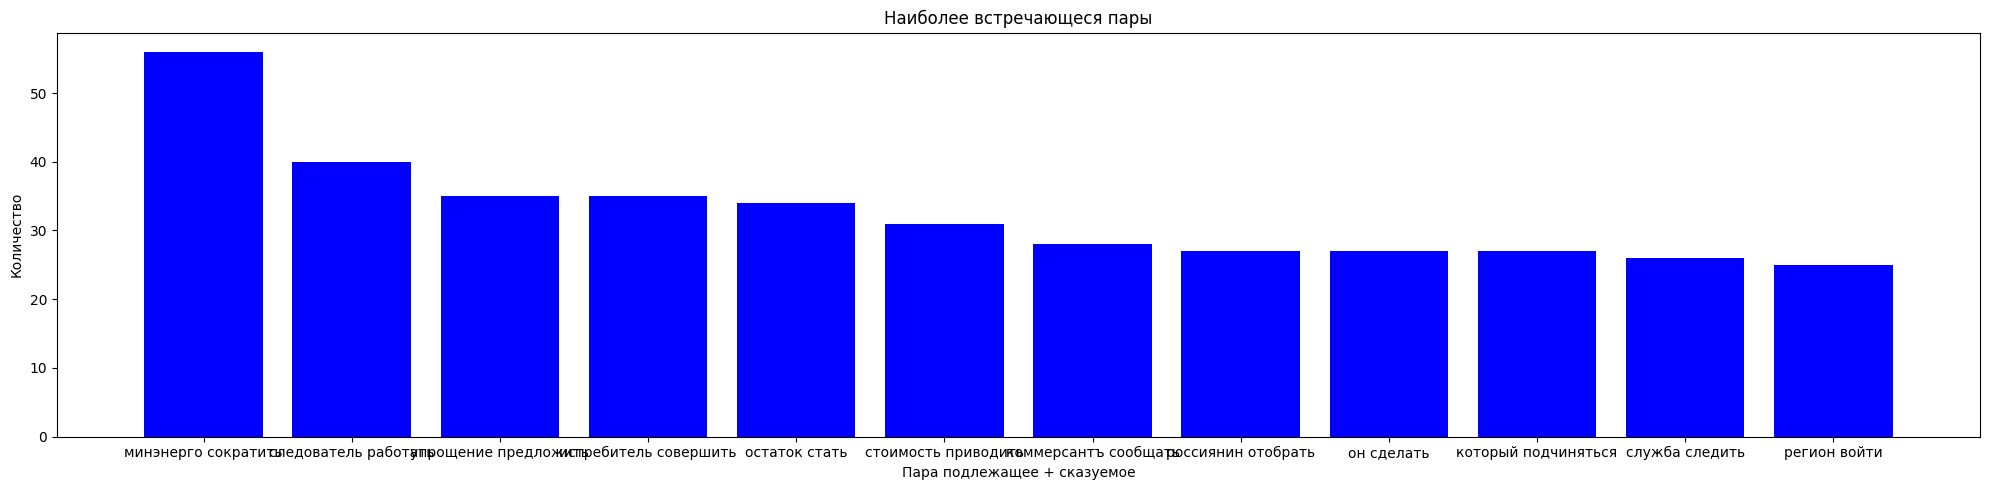

In [45]:
pairs = [pair[0][0] + ' ' + pair[0][1] for pair in all_pairs_counter.most_common(12)]
counter = [pair[1] for pair in all_pairs_counter.most_common(12)]

plt.figure(figsize=(20, 5))
plt.bar(pairs, counter, color = 'blue')
plt.title("Наиболее встречающеся пары")
plt.ylabel("Количество")
plt.xlabel("Пара подлежащее + сказуемое")
plt.tight_layout()
plt.show()

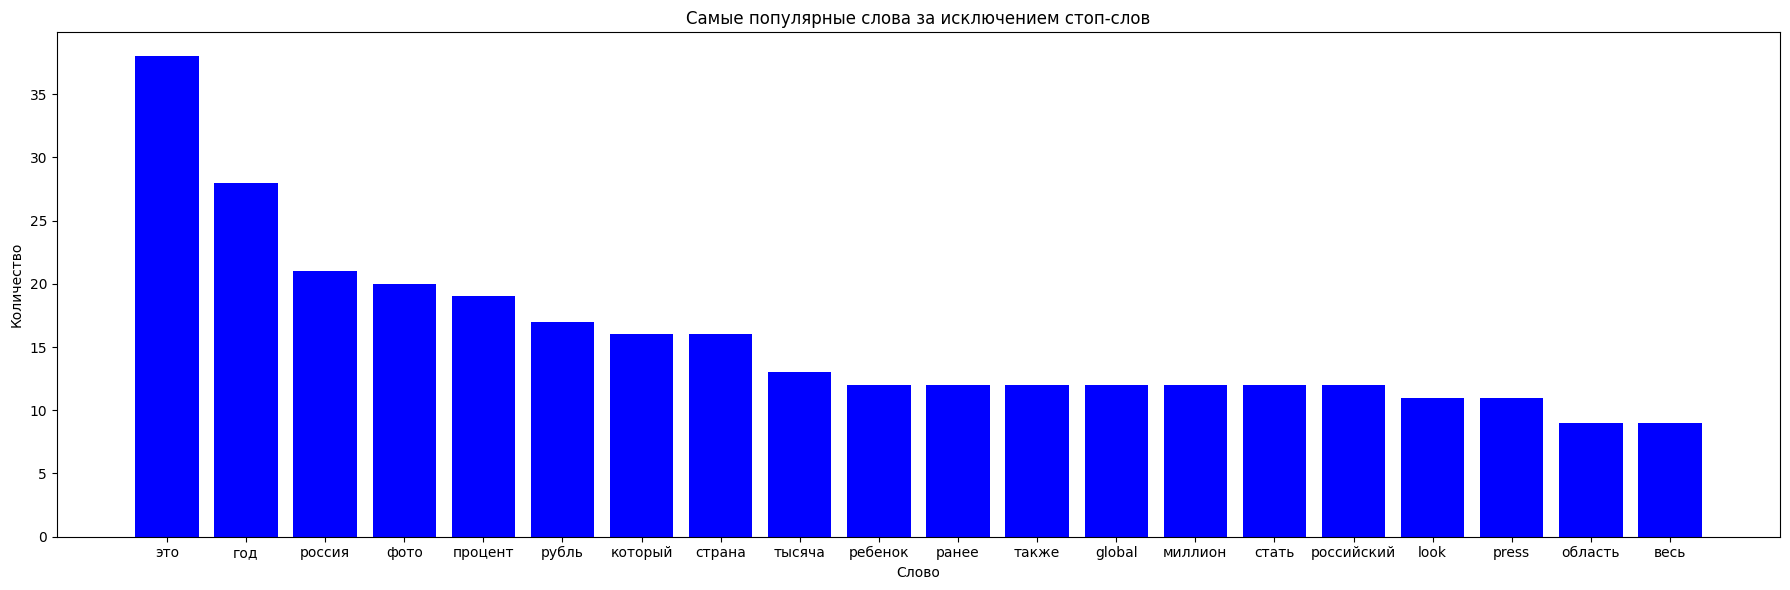

In [46]:
words = [pair[0] for pair in filtered_count.most_common(20)]
counter = [pair[1] for pair in filtered_count.most_common(20)]

plt.figure(figsize=(18, 6))
plt.bar(words, counter, color = 'blue')
plt.title("Самые популярные слова за исключением стоп-слов")
plt.ylabel("Количество")
plt.xlabel("Слово")
plt.tight_layout()
plt.show()


In [31]:
from bs4 import BeautifulSoup
import requests
import sqlite3
from concurrent.futures import ThreadPoolExecutor

SITE_URL = 'https://lenta.ru'
PARTS_URL = f'{SITE_URL}/parts/news'

# Создаем сессию для отправки HTTP-запросов
session = requests.Session()
session.headers.update({
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
})

# Функция для создания таблицы в базе данных SQLite
def create_table(conn):
    try:
        cursor = conn.cursor()
        cursor.execute('''CREATE TABLE IF NOT EXISTS articles
                          (id INTEGER PRIMARY KEY AUTOINCREMENT,
                          title TEXT,
                          category TEXT,
                          create_date TEXT,
                          body TEXT,
                          url TEXT UNIQUE)''')
        conn.commit()
    except sqlite3.Error as e:
        print("Ошибка при создании таблицы:", e)

# Функция для добавления записи в базу данных SQLite
def insert_article(conn, title, category, create_date, body, url):
    try:
        cursor = conn.cursor()
        cursor.execute('''INSERT INTO articles (title, category, create_date, body, url) VALUES (?, ?, ?, ?, ?)''',
                       (title, category, create_date, "\n".join(body), url))
        conn.commit()
    except sqlite3.Error as e:
        print("Ошибка при добавлении записи:", e)

# Основная функция для сохранения данных в базу данных SQLite
def save_to_database(title, category, create_date, body, url):
    with sqlite3.connect('articles.db') as conn:
        create_table(conn)
        insert_article(conn, title, category, create_date, body, url)

# Функция для получения списка URL статей на странице
def get_article_urls(page_url):
    response = session.get(page_url)
    if response.ok:
        soup = BeautifulSoup(response.text, 'html.parser')
        body = soup.find_all(class_='parts-page__item')
        return [SITE_URL + item.find('a').get('href') for item in body if item.find('a')]
    else:
        print('Ошибка при запросе:', response.status_code)
        return []

# Функция для получения содержания статьи
def get_article_content(article_url):
    response = session.get(article_url)
    if response.ok:
        soup = BeautifulSoup(response.text, 'html.parser')

        title = soup.find('h1').text if soup.find('h1') else 'No Title'
        body = [p.text for p in soup.find('body').find_all('p')]
        category_tag = soup.find('a', class_='topic-header__rubric')
        category = category_tag.text if category_tag else 'Неизвестно'
        date_tag = soup.find('time', class_='topic-header__time')
        create_date = date_tag.get('datetime') if date_tag else 'Неизвестно'

        return title, category, create_date, body, article_url
    else:
        print('Ошибка при запросе:', response.status_code)
        return None, None, None, None, None

# Основная функция для запуска парсинга и сохранения данных
def main():
    page_urls = [PARTS_URL]  # начальная страница
    article_urls = []
    with ThreadPoolExecutor(max_workers=5) as executor:
        # получаем адреса статей на начальной странице
        article_urls = executor.map(get_article_urls, page_urls)

    for url_list in article_urls:
        for article_url in url_list:
            title, category, create_date, body, url = get_article_content(article_url)  # получаем содержание статьи
            if title and body and category and create_date:
                save_to_database(title, category, create_date, body, url)  # сохраняем статью в базу данных

if __name__ == "__main__":
    main()
